In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

#Need to use the latest Tensorflow version - can find it at https://www.tensorflow.org/install/
import tensorflow as tf

import numpy as np
import os
import datetime

In [ ]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.8.0


Check if GPU is available - always good to double-check. When using Colab, I sometimes forget to change runtime type, so having this  code will always catch it.

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1863121634329597133
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17600917876441254252
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


If need to remove logs from previous runs, uncomment and adjust the directory name:

In [ ]:
#!rm -rf ./checkpoints_2019.04.21-20:48:58/ #if using Tensorboard or other logging

### Download the dataset

Check the current directory and upload the text file:

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import os
path = os.getcwd()
print(path)

In [ ]:
# if using Google Colab
import os
from google.colab import files
path="/content/drive/MyDrive/Texts"

for fn in os.listdir(path):
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(path)))
  
# Click Files tab - the updload file(s) will be there

User uploaded file "1.chipde.damoh.schneevonmorgen.com.txt" with length 28 bytes
User uploaded file "1bm.cqcounter.com.txt" with length 28 bytes
User uploaded file "5avxd.voluumtrk.com.txt" with length 28 bytes
User uploaded file "2mdn.net.txt" with length 28 bytes
User uploaded file "5c2fk.voluumtrk.com.txt" with length 28 bytes
User uploaded file "6glass1.info.txt" with length 28 bytes
User uploaded file "7.ptp22.com.txt" with length 28 bytes
User uploaded file "08.185.87.188.liveadvert.com.txt" with length 28 bytes
User uploaded file "8hykthze.cricket.txt" with length 28 bytes
User uploaded file "9cfa-356e-ec76-7adf.reporo.net.txt" with length 28 bytes
User uploaded file "192.168.media.trafficjunky.net.txt" with length 28 bytes
User uploaded file "31.6.87.194.dynamic.dol.ru.txt" with length 28 bytes
User uploaded file "208.185.87.120.liveadvert.com.txt" with length 28 bytes
User uploaded file "208.185.87.170.liveadvert.com.txt" with length 28 bytes
User uploaded file "208.185.87.181

In case you have multiple files that need to be merged:

In [ ]:
#If using a directory with multiple files
import glob
import codecs
books = sorted(glob.glob("/content/drive/MyDrive/Texts" + "/*.txt"))
print("Found {} books".format(len(books)))

text = ""
for filename in books:
    with codecs.open(filename, 'r', 'utf-8') as books:
        text += books.read()

print("Text is {} characters long".format(len(text)))

Found 831 books
Text is 6525863 characters long


In [ ]:
#If using a single file
text = open(path + '/Iliad_v3.txt', 'rb').read().decode(encoding='utf-8')
print("Text is {} characters long".format(len(text)))

In [ ]:
words = [w for w in text.split(' ') if w.strip() != '' or w == '\n']
print("Text is {} words long".format(len(words)))

Text is 761441 words long


Make sure the text sample is what you expected:

In [ ]:
print(text[:100])

ПОЛИТИКА ИСПОЛЬЗОВАНИЯ ФАЙЛОВ COOKIES
Когда вы пользуетесь нашим сайтом, мы можем собирать информац


## Prepare the text

In [ ]:
#Map unique characters to indices
vocab = sorted(set(text))
print ('There are {} unique characters'.format(len(vocab)))
char2int = {c:i for i, c in enumerate(vocab)}
int2char = np.array(vocab)
print('Vector:\n')
for char,_ in zip(char2int, range(len(vocab))):
   print(' {:4s}: {:3d},'.format(repr(char), char2int[char]))

There are 222 unique characters
Vector:

 '\t':   0,
 '\n':   1,
 '\r':   2,
 ' ' :   3,
 '!' :   4,
 '"' :   5,
 '#' :   6,
 '$' :   7,
 '%' :   8,
 '&' :   9,
 "'" :  10,
 '(' :  11,
 ')' :  12,
 '*' :  13,
 '+' :  14,
 ',' :  15,
 '-' :  16,
 '.' :  17,
 '/' :  18,
 '0' :  19,
 '1' :  20,
 '2' :  21,
 '3' :  22,
 '4' :  23,
 '5' :  24,
 '6' :  25,
 '7' :  26,
 '8' :  27,
 '9' :  28,
 ':' :  29,
 ';' :  30,
 '<' :  31,
 '=' :  32,
 '>' :  33,
 '?' :  34,
 '@' :  35,
 'A' :  36,
 'B' :  37,
 'C' :  38,
 'D' :  39,
 'E' :  40,
 'F' :  41,
 'G' :  42,
 'H' :  43,
 'I' :  44,
 'J' :  45,
 'K' :  46,
 'L' :  47,
 'M' :  48,
 'N' :  49,
 'O' :  50,
 'P' :  51,
 'Q' :  52,
 'R' :  53,
 'S' :  54,
 'T' :  55,
 'U' :  56,
 'V' :  57,
 'W' :  58,
 'X' :  59,
 'Y' :  60,
 'Z' :  61,
 '[' :  62,
 '\\':  63,
 ']' :  64,
 '_' :  65,
 '`' :  66,
 'a' :  67,
 'b' :  68,
 'c' :  69,
 'd' :  70,
 'e' :  71,
 'f' :  72,
 'g' :  73,
 'h' :  74,
 'i' :  75,
 'j' :  76,
 'k' :  77,
 'l' :  78,
 'm' :  79,

In [ ]:
text_as_int = np.array([char2int[ch] for ch in text], dtype=np.int32)
print ('{}\n mapped to integers:\n {}'.format(repr(text[:100]), text_as_int[:100]))

'ПОЛИТИКА ИСПОЛЬЗОВАНИЯ ФАЙЛОВ COOKIES\r\nКогда вы пользуетесь нашим сайтом, мы можем собирать информац'
 mapped to integers:
 [143 142 139 136 146 136 138 128   3 136 145 143 142 139 156 135 142 130
 128 141 136 159   3 148 128 137 139 142 130   3  38  50  50  46  44  40
  54   2   1 138 174 163 164 160   3 162 187   3 175 174 171 188 167 179
 165 178 165 177 188   3 173 160 184 168 172   3 177 160 169 178 174 172
  15   3 172 187   3 172 174 166 165 172   3 177 174 161 168 176 160 178
 188   3 168 173 180 174 176 172 160 182]


In [ ]:
tr_text = text_as_int[:5000000] #text separated for training, divisible by the batch size (64)
val_text = text_as_int[5000000:] #text separated for validation

Comfirm the shapes are what we expect:

In [ ]:
print(text_as_int.shape, tr_text.shape, val_text.shape)

(6525863,) (5000000,) (1525863,)


## Build the model

In [ ]:
# Populate the library of tunables - I like keeping them centralized in case I need to change things around:
batch_size = 64
buffer_size = 10000
embedding_dim = 256
epochs = 30
seq_length = 200
examples_per_epoch = len(text)//seq_length
#lr = 0.001 #will use default for Adam optimizer
rnn_units = 1024
vocab_size = len(vocab)

In [ ]:
tr_char_dataset = tf.data.Dataset.from_tensor_slices(tr_text)
val_char_dataset = tf.data.Dataset.from_tensor_slices(val_text)
print(tr_char_dataset, val_char_dataset)
tr_sequences = tr_char_dataset.batch(seq_length+1, drop_remainder=True)
val_sequences = val_char_dataset.batch(seq_length+1, drop_remainder=True)
print(tr_sequences, val_sequences)

for item in tr_sequences.take(1):
    print(repr(''.join(int2char[item.numpy()])))
    print(item)
for item in val_sequences.take(1):
    print(repr(''.join(int2char[item.numpy()])))
    print(item)

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)> <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>
<BatchDataset element_spec=TensorSpec(shape=(201,), dtype=tf.int32, name=None)> <BatchDataset element_spec=TensorSpec(shape=(201,), dtype=tf.int32, name=None)>
'ПОЛИТИКА ИСПОЛЬЗОВАНИЯ ФАЙЛОВ COOKIES\r\nКогда вы пользуетесь нашим сайтом, мы можем собирать информацию с помощью файлов cookies. Вся информация полностью конфиденциальна и никогда не передается третьим'
tf.Tensor(
[143 142 139 136 146 136 138 128   3 136 145 143 142 139 156 135 142 130
 128 141 136 159   3 148 128 137 139 142 130   3  38  50  50  46  44  40
  54   2   1 138 174 163 164 160   3 162 187   3 175 174 171 188 167 179
 165 178 165 177 188   3 173 160 184 168 172   3 177 160 169 178 174 172
  15   3 172 187   3 172 174 166 165 172   3 177 174 161 168 176 160 178
 188   3 168 173 180 174 176 172 160 182 168 190   3 177   3 175 174 172
 174 185 188 190   3 

In [ ]:
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

tr_dataset = tr_sequences.map(split_input_target).shuffle(buffer_size).batch(batch_size, drop_remainder=True)
val_dataset = val_sequences.map(split_input_target).shuffle(buffer_size).batch(batch_size, drop_remainder=True)
print(tr_dataset, val_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(64, 200), dtype=tf.int32, name=None), TensorSpec(shape=(64, 200), dtype=tf.int32, name=None))> <BatchDataset element_spec=(TensorSpec(shape=(64, 200), dtype=tf.int32, name=None), TensorSpec(shape=(64, 200), dtype=tf.int32, name=None))>


In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.2), 
        tf.keras.layers.LSTM(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(vocab_size)
    ])
    return model

In [ ]:
model = build_model(
    vocab_size = len(vocab),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=batch_size)

## Run the model

Check the output shape

In [ ]:
for input_example_batch, target_example_batch in tr_dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "respectively: batch_size, sequence_length, vocab_size")

(64, 200, 222) respectively: batch_size, sequence_length, vocab_size


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (64, None, 256)           56832     
                                                                 
 dropout_9 (Dropout)         (64, None, 256)           0         
                                                                 
 lstm_6 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dropout_10 (Dropout)        (64, None, 1024)          0         
                                                                 
 lstm_7 (LSTM)               (64, None, 1024)          8392704   
                                                                 
 dropout_11 (Dropout)        (64, None, 1024)          0         
                                                                 
 dense_3 (Dense)             (64, None, 222)          

Untrained model output:

In [ ]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()
print("Input: \n", repr("".join(int2char[input_example_batch[0]])))
print()
print("Predictions: \n", repr("".join(int2char[sampled_indices ])))

Input: 
 ' вы сможете найти дополнительную информацию о том, кем мы являемся, как связаться с нами и как мы осуществляем обработку персональных данных.\r\n\r\n \r\n\r\n ПОЛИТИКА И ПРЕДПОЧТЕНИЯ В ОТНОШЕНИИ ФАЙЛОВ COOKIE'

Predictions: 
 'êØ:Yп–üöYШ·ZыÇ-Ж_–GШid.»―4yЦБ•@\u202f1öПRe•вШ)WJдПбТ„d06#нń\tO{L4\\ЮzvъSH”р,!х|1xrнw=CⓘbF\xa0y‑жыДØgØоbбcóщRr\xa0wbpЁ!?КtEЯ©иъpIJk.D‑ЗАШtgйeÇ%f-®―а3MМТJ\xa0×+4j®ус\u202f·%СÇ×|ЫЦИФ\tт›ЬSдLÇ88Lq«-„l[/pЫrQФc/Г7нs]н#─чЗÜз●Мöfw'


In [ ]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)
def accuracy(labels, logits):
    return tf.keras.metrics.sparse_categorical_accuracy(labels, logits)

example_batch_loss  = loss(target_example_batch, example_batch_predictions)
example_batch_acc  = accuracy(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Loss:      ", example_batch_loss.numpy().mean())
print("Accuracy:      ", example_batch_acc.numpy().mean())

Prediction shape:  (64, 200, 222)  # (batch_size, sequence_length, vocab_size)
Loss:       5.402708
Accuracy:       0.002578125


In [ ]:
optimizer = tf.keras.optimizers.Adam() 
model.compile(optimizer=optimizer, loss=loss) 

In [ ]:
patience = 10
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)

In [ ]:
checkpoint_dir = './checkpoints'+ datetime.datetime.now().strftime("_%Y.%m.%d-%H:%M:%S")
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [ ]:
history = model.fit(tr_dataset, epochs=epochs, callbacks=[checkpoint_callback, early_stop] , validation_data=val_dataset)
print ("Training stopped as there was no improvement after {} epochs".format(patience))

Epoch 1/30
388/388 [==============================] - 337s 854ms/step - loss: 2.1243 - val_loss: 1.1753
Epoch 2/30
388/388 [==============================] - 335s 857ms/step - loss: 1.0614 - val_loss: 0.9115
Epoch 3/30
388/388 [==============================] - 335s 855ms/step - loss: 0.8888 - val_loss: 0.8075
Epoch 4/30
388/388 [==============================] - 335s 856ms/step - loss: 0.7954 - val_loss: 0.7457
Epoch 5/30
388/388 [==============================] - 334s 854ms/step - loss: 0.7332 - val_loss: 0.7055
Epoch 6/30
388/388 [==============================] - 333s 851ms/step - loss: 0.6871 - val_loss: 0.6761
Epoch 7/30
388/388 [==============================] - 332s 849ms/step - loss: 0.6508 - val_loss: 0.6538
Epoch 8/30
388/388 [==============================] - 332s 847ms/step - loss: 0.6210 - val_loss: 0.6354
Epoch 9/30
388/388 [==============================] - 332s 848ms/step - loss: 0.5968 - val_loss: 0.6218
Epoch 10/30
388/388 [==============================] - 332s 849m

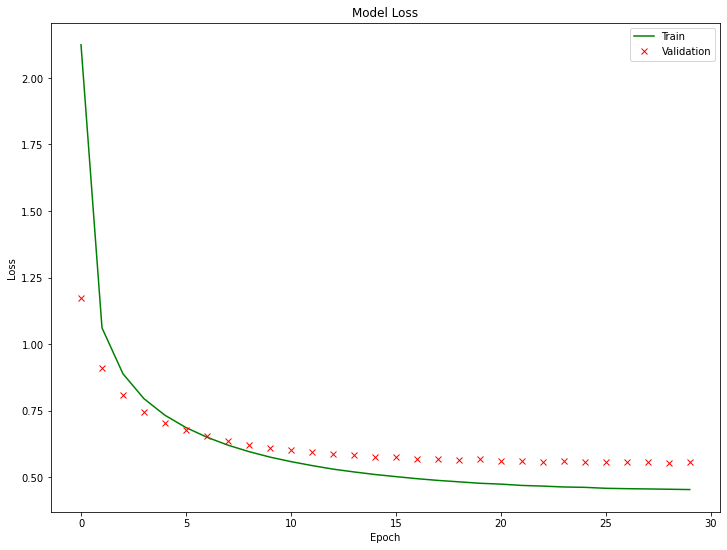

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.plot(history.history['loss'], 'g')
plt.plot(history.history['val_loss'], 'rx') #use if have val data
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.legend(['Train', 'Validation'], loc='upper right') #use if have val date
plt.show()

## Generate text

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

In [ ]:
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)
#model.load_weights('/content/drive/MyDrive/Texts/checkpoints_2022.05.13-17:46:53/ckpt_30.index')  #if the latest checkpoint is not your preferred
model.load_weights(tf.train.latest_checkpoint('/content/drive/MyDrive/Texts/checkpoints_2022.05.13-17:46:53/'))  #if the latest checkpoint is what you want
model.build(tf.TensorShape([1, None]))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (1, None, 256)            56832     
                                                                 
 dropout_21 (Dropout)        (1, None, 256)            0         
                                                                 
 lstm_14 (LSTM)              (1, None, 1024)           5246976   
                                                                 
 dropout_22 (Dropout)        (1, None, 1024)           0         
                                                                 
 lstm_15 (LSTM)              (1, None, 1024)           8392704   
                                                                 
 dropout_23 (Dropout)        (1, None, 1024)           0         
                                                                 
 dense_7 (Dense)             (1, None, 222)           

In [ ]:
def generate_text(model, start_string):
    
    print('Generating with seed: "' + start_string + '"')
  
    num_generate = 1000

    input_eval = [char2int[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []

    temperature = 1.0

    model.reset_states()
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(int2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [ ]:
print(generate_text(model, start_string="Cookie для отслеживания"))

Generating with seed: "Cookie для отслеживания"
Cookie для отслеживания документируются случаи и время перехода по ссылкам на те или иные предложения. Если впоследствии вы всегда можете изменить настройки через свой браузер на предмет улучшения работы веб-сайта; маркетинговые функции, а также для предоставления услуги личности, когда пользователь посещает веб-сайт (и предоставляем следующие cookie-файлы для управления процессом входа в Личный кабинет под или в разделе «Функции этого веб-сайта» и блокировка установки файлов cookie для страниц
Wordfence	Функциональные/

Используются для отслеживания того, как посетители перемещается по веб-сайту. Все данные о состояния посетителей и касательно отказа от такого согласия.
 Аналогичные технологии для хранения информации – технологии, позволяющие записывать определённую информацию в
вашей личности из-за настоящего уведомления.

Обратите внимание, что чтобы узнать больше о том, как используются различные сторонние файлы cookie (далее — «Goog

In [ ]:
with open('sampleTF2.txt', 'w') as f:
    sampleTF2 = generate_text(model, start_string="joy of gods")
    f.write(sampleTF2)

Free memory resources if needed:

In [ ]:
import signal

os.kill(os.getpid(), signal.SIGKILL)